In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [2]:
train = pd.read_csv('data/train.csv')
test=pd.read_csv('data/test.csv')
submission = pd.read_csv('data/sample_submission.csv')

In [3]:
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [4]:
len(train)

7613

In [6]:
train['text_len'] = train.text.map(lambda x : len(x))

(array([  1.,   4.,   7.,   2.,  17.,   5.,  16.,   9.,  11.,  13.,  17.,
         17.,  28.,  21.,  35.,  20.,  31.,  43.,  34.,  29.,  46.,  54.,
         69.,  60.,  73.,  98.,  55.,  82., 119.,  94.,  56., 107.,  79.,
         87.,  45.,  90.,  92.,  97.,  60.,  88.,  92.,  90.,  65., 168.,
        521., 330.,  52.,  31.,   7.,   4.]),
 array([ 14.  ,  16.74,  19.48,  22.22,  24.96,  27.7 ,  30.44,  33.18,
         35.92,  38.66,  41.4 ,  44.14,  46.88,  49.62,  52.36,  55.1 ,
         57.84,  60.58,  63.32,  66.06,  68.8 ,  71.54,  74.28,  77.02,
         79.76,  82.5 ,  85.24,  87.98,  90.72,  93.46,  96.2 ,  98.94,
        101.68, 104.42, 107.16, 109.9 , 112.64, 115.38, 118.12, 120.86,
        123.6 , 126.34, 129.08, 131.82, 134.56, 137.3 , 140.04, 142.78,
        145.52, 148.26, 151.  ]),
 <BarContainer object of 50 artists>)

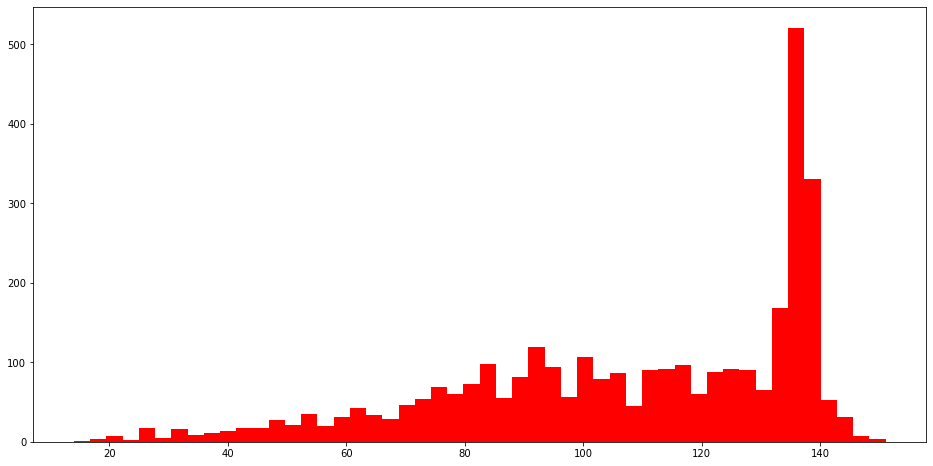

In [51]:

x1= train[train.target==1]['text_len']
plt.figure (figsize=(16,8))
plt.hist(x1,color='red',bins=50)



(array([  9.,  10.,  10.,  25.,  23.,  30.,  43.,  36.,  55.,  74.,  60.,
         54.,  88.,  77.,  71.,  72.,  62.,  80.,  81.,  86.,  95.,  87.,
         79., 106., 103.,  96., 101., 105.,  90., 111., 106., 110.,  95.,
        110., 109., 119.,  94., 112., 123., 122., 123., 171., 192., 363.,
        288.,  65.,  16.,   3.,   1.,   1.]),
 array([  7.,  10.,  13.,  16.,  19.,  22.,  25.,  28.,  31.,  34.,  37.,
         40.,  43.,  46.,  49.,  52.,  55.,  58.,  61.,  64.,  67.,  70.,
         73.,  76.,  79.,  82.,  85.,  88.,  91.,  94.,  97., 100., 103.,
        106., 109., 112., 115., 118., 121., 124., 127., 130., 133., 136.,
        139., 142., 145., 148., 151., 154., 157.]),
 <BarContainer object of 50 artists>)

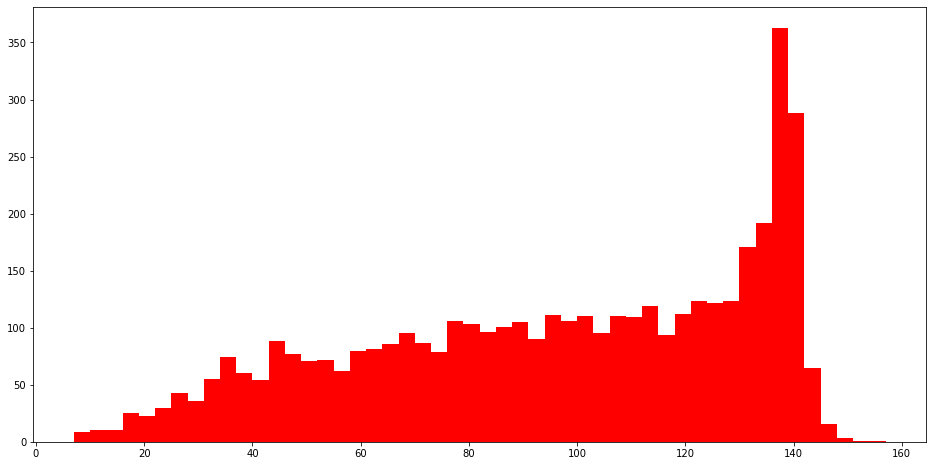

In [50]:
x2= train[train.target==0]['text_len']
plt.figure (figsize=(16,8))
plt.hist(x2,color='red',bins=50)

In [8]:
train.isnull().sum()/len(train)*100

id           0.000000
keyword      0.801261
location    33.272035
text         0.000000
target       0.000000
text_len     0.000000
dtype: float64

In [9]:
train=train.drop('id',axis=1)
test=test.drop('id',axis=1)

In [10]:
train['location'].nunique()

3341

In [11]:
train['location'].unique()

array([nan, 'Birmingham', 'Est. September 2012 - Bristol', ...,
       'Vancouver, Canada', 'London ', 'Lincoln'], dtype=object)

In [12]:
train['location'].value_counts()

USA                    104
New York                71
United States           50
London                  45
Canada                  29
                      ... 
MontrÌ©al, QuÌ©bec       1
Montreal                 1
ÌÏT: 6.4682,3.18287      1
Live4Heed??              1
Lincoln                  1
Name: location, Length: 3341, dtype: int64

In [13]:
train=train.drop('location',axis=1)
test=test.drop('location',axis=1)

In [14]:
train['keyword'].nunique()

221

In [15]:
train['keyword'].unique()

array([nan, 'ablaze', 'accident', 'aftershock', 'airplane%20accident',
       'ambulance', 'annihilated', 'annihilation', 'apocalypse',
       'armageddon', 'army', 'arson', 'arsonist', 'attack', 'attacked',
       'avalanche', 'battle', 'bioterror', 'bioterrorism', 'blaze',
       'blazing', 'bleeding', 'blew%20up', 'blight', 'blizzard', 'blood',
       'bloody', 'blown%20up', 'body%20bag', 'body%20bagging',
       'body%20bags', 'bomb', 'bombed', 'bombing', 'bridge%20collapse',
       'buildings%20burning', 'buildings%20on%20fire', 'burned',
       'burning', 'burning%20buildings', 'bush%20fires', 'casualties',
       'casualty', 'catastrophe', 'catastrophic', 'chemical%20emergency',
       'cliff%20fall', 'collapse', 'collapsed', 'collide', 'collided',
       'collision', 'crash', 'crashed', 'crush', 'crushed', 'curfew',
       'cyclone', 'damage', 'danger', 'dead', 'death', 'deaths', 'debris',
       'deluge', 'deluged', 'demolish', 'demolished', 'demolition',
       'derail', 'der

In [16]:
train['keyword'].mode()

0    fatalities
Name: keyword, dtype: object

In [17]:
train['keyword'].value_counts()

fatalities               45
deluge                   42
armageddon               42
sinking                  41
damage                   41
                         ..
forest%20fire            19
epicentre                12
threat                   11
inundation               10
radiation%20emergency     9
Name: keyword, Length: 221, dtype: int64

In [18]:
train ['keyword'] = train['keyword'].fillna(train['keyword'].mode())
test ['keyword'] = test['keyword'].fillna(test['keyword'].mode())

In [19]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   keyword   7553 non-null   object
 1   text      7613 non-null   object
 2   target    7613 non-null   int64 
 3   text_len  7613 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 238.0+ KB


In [20]:
import re
import nltk

In [21]:
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus_train = []
for i in range(0, len(train)):
  review = re.sub('[^a-zA-Z]', ' ', train['text'][i])
  review = review.lower()
  review = review.split()
  ps = PorterStemmer()
  all_stopwords = stopwords.words('english')
  all_stopwords.remove('not')
  review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
  review = ' '.join(review)
  corpus_train.append(review)

[nltk_data] Downloading package stopwords to C:\Users\ZAIDI Mohamed
[nltk_data]     Arysse\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [22]:
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus_test = []
for i in range(0, len(test)):
  review = re.sub('[^a-zA-Z]', ' ', test['text'][i])
  review = review.lower()
  review = review.split()
  ps = PorterStemmer()
  all_stopwords = stopwords.words('english')
  all_stopwords.remove('not')
  review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
  review = ' '.join(review)
  corpus_test.append(review)

[nltk_data] Downloading package stopwords to C:\Users\ZAIDI Mohamed
[nltk_data]     Arysse\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [23]:
corpus_train

['deed reason earthquak may allah forgiv us',
 'forest fire near la rong sask canada',
 'resid ask shelter place notifi offic evacu shelter place order expect',
 'peopl receiv wildfir evacu order california',
 'got sent photo rubi alaska smoke wildfir pour school',
 'rockyfir updat california hwi close direct due lake counti fire cafir wildfir',
 'flood disast heavi rain caus flash flood street manit colorado spring area',
 'top hill see fire wood',
 'emerg evacu happen build across street',
 'afraid tornado come area',
 'three peopl die heat wave far',
 'haha south tampa get flood hah wait second live south tampa gonna gonna fvck flood',
 'rain flood florida tampabay tampa day lost count',
 'flood bago myanmar arriv bago',
 'damag school bu multi car crash break',
 'man',
 'love fruit',
 'summer love',
 'car fast',
 'goooooooaaaaaal',
 'ridicul',
 'london cool',
 'love ski',
 'wonder day',
 'looooool',
 'way eat shit',
 'nyc last week',
 'love girlfriend',
 'cooool',
 'like pasta',
 '

In [24]:
corpus_test

['happen terribl car crash',
 'heard earthquak differ citi stay safe everyon',
 'forest fire spot pond gees flee across street cannot save',
 'apocalyps light spokan wildfir',
 'typhoon soudelor kill china taiwan',
 'shake earthquak',
 'probabl still show life arsen yesterday eh eh',
 'hey',
 'nice hat',
 'fuck',
 'like cold',
 'nooooooooo',
 'tell',
 '',
 'awesom',
 'birmingham wholesal market ablaz bbc news fire break birmingham wholesal market http co irwqcezweu',
 'sunkxssedharri wear short race ablaz',
 'previouslyondoyintv toke makinwa marriag crisi set nigerian twitter ablaz http co cmghxba xi',
 'check http co roi nsmejj http co tj zjin http co yduixefip http co lxtjc kl nsfw',
 'psa split person techi follow ablaz co burner follow ablaz',
 'bewar world ablaz sierra leon amp guap',
 'burn man ablaz turban diva http co hodwosamw via etsi',
 'not diss song peopl take thing run smh eye open though set game ablaz cyhitheprync',
 'rape victim die set ablaz year old girl die burn inj

In [35]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X_train = cv.fit_transform(corpus_train).toarray()
y_train = train['target'].values

In [36]:
y_train

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [42]:
X_test = cv.transform(corpus_test).toarray()

In [38]:
len(X_train)

7613

In [39]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [43]:
X_test

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [44]:
y_pred = classifier.predict(X_test)


In [45]:
submission['target'] = y_pred
submission.to_csv('submission.csv', index=False)
submission.head()

,id,target
0,0,1
1,2,1
2,3,1
3,9,1
4,11,1
